# <font color='#A6032F'> HEART DISEASE PREDICTION

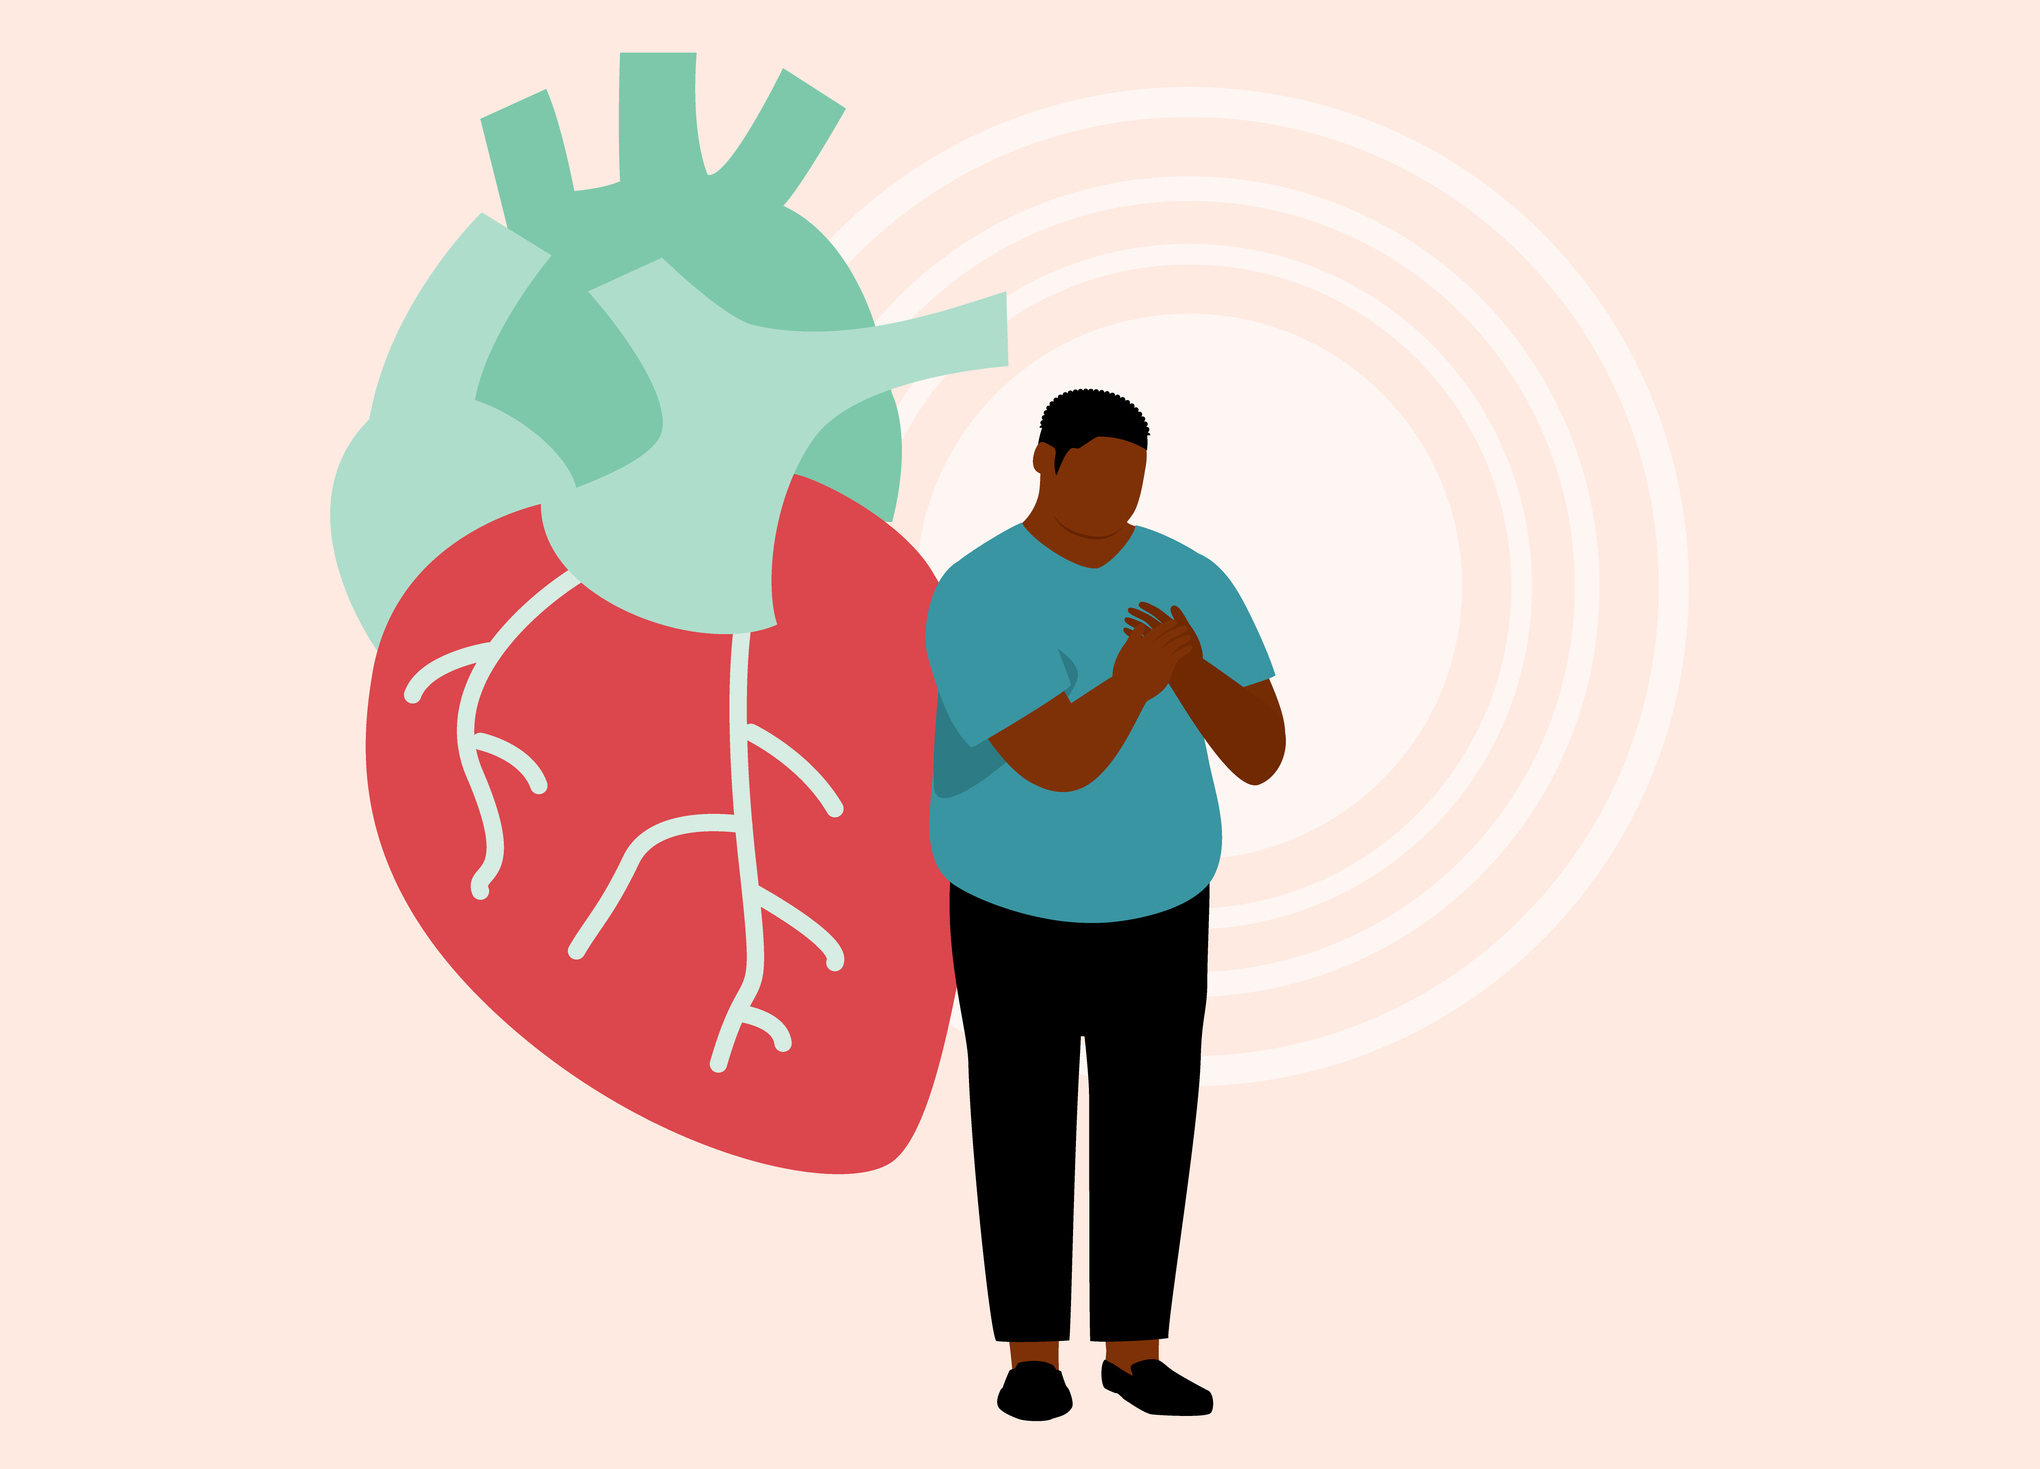

## <font color='#A6032F'>Introduction
Cardiovascular diseases are one of the leading causes of mortality worldwide. Early diagnosis of heart disease can significantly improve treatment outcomes and reduce health risks. Machine learning models can help in predicting heart disease based on various patient attributes, providing a valuable tool for medical professionals. This project aims to develop a predictive model for heart disease using patient data.

## <font color='#A6032F'>Aim
The goal of this project is to build a machine learning model that predicts the likelihood of a person having heart disease based on their medical attributes. By analyzing key health indicators, the model can assist in early diagnosis and support clinical decision-making.

## <font color='#A6032F'>Dataset Description
The dataset consists of multiple features that provide information about the patient's health condition. Below are the descriptions of each column:

- **age**: Age of the patient in years.
- **sex**: Gender of the patient (1 = male, 0 = female).
- **cp** (Chest Pain Type): 
  - 0 = Typical angina 
  - 1 = Atypical angina 
  - 2 = Non-anginal pain 
  - 3 = Asymptomatic
- **trestbps** (Resting Blood Pressure): The patient’s resting blood pressure in mm Hg.
- **chol** (Serum Cholesterol): Serum cholesterol level in mg/dl.
- **fbs** (Fasting Blood Sugar): Whether fasting blood sugar is > 120 mg/dl (1 = true, 0 = false).
- **restecg** (Resting Electrocardiographic Results): 
  - 0 = Normal 
  - 1 = ST-T wave abnormality 
  - 2 = Left ventricular hypertrophy
- **thalach** (Maximum Heart Rate Achieved): Maximum heart rate achieved during exercise.
- **exang** (Exercise-Induced Angina): 1 = Yes, 0 = No.
- **oldpeak** (ST Depression Induced by Exercise): ST depression relative to rest.
- **slope** (Slope of the Peak Exercise ST Segment): 
  - 0 = Upsloping 
  - 1 = Flat 
  - 2 = Downsloping
- **ca** (Number of Major Vessels Colored by Fluoroscopy): Values range from 0 to 4.
- **thal** (Thalassemia): 
  - 1 = Normal 
  - 2 = Fixed defect 
  - 3 = Reversible defect
- **target**: The presence of heart disease (1 = Yes, 0 = No).

## <font color='#A6032F'> Requirements

In [158]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## <font color='#A6032F'> Import Data

In [160]:
df=pd.read_csv('heart.csv')

## <font color='#A6032F'> EDA (Exploratory Data Analysis)

In [162]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [163]:
df.shape

(303, 14)

In [164]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [167]:
df['target'].unique()

array([1, 0], dtype=int64)

In [168]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

## <font color='#A6032F'> Data Visualization

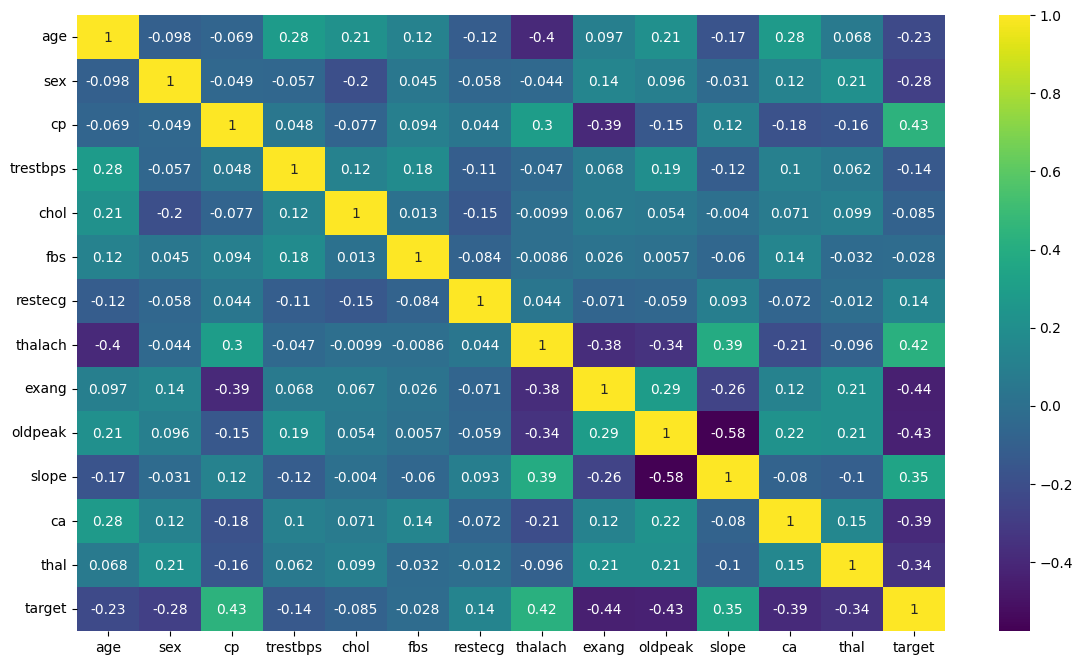

In [170]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis');

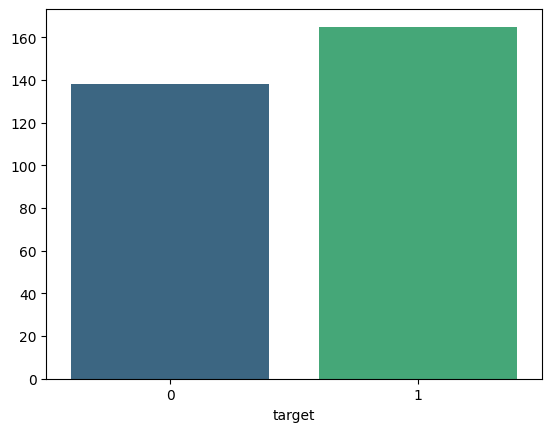

In [171]:
sns.barplot(y=df['target'].value_counts().values,
            x=df['target'].value_counts().index,
            palette='viridis');

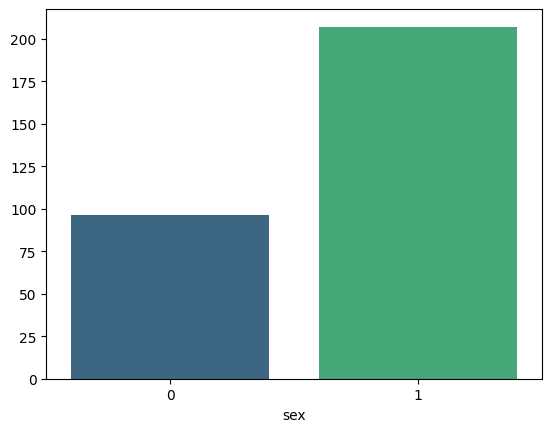

In [172]:
sns.barplot(y=df['sex'].value_counts().values,
            x=df['sex'].value_counts().index,
            palette='viridis');

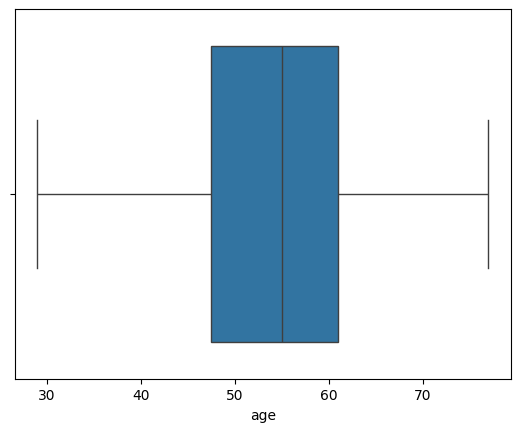

In [173]:
sns.boxplot(x=df['age']);

<Axes: xlabel='age', ylabel='thalach'>

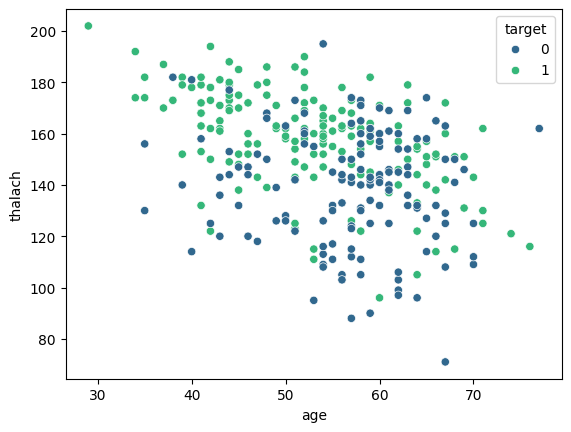

In [174]:
sns.scatterplot(x=df['age'],y=df['thalach'],palette='viridis',hue=df['target'])

## <font color='#A6032F'> Modelling

In [176]:
x=df.drop('target',axis=1)
y=df[['target']]

In [177]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [178]:
from sklearn.preprocessing import normalize, scale #z-score
x_new=scale(x) 
x=pd.DataFrame(x_new,columns=x.columns)

In [179]:
x.shape,y.shape

((303, 13), (303, 1))

In [180]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    # Get unique labels from df["Credit_Score"]
    labels = sorted(y["target"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues",cbar=None)
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]

Confusion Matrix of KNeighbors Classifier


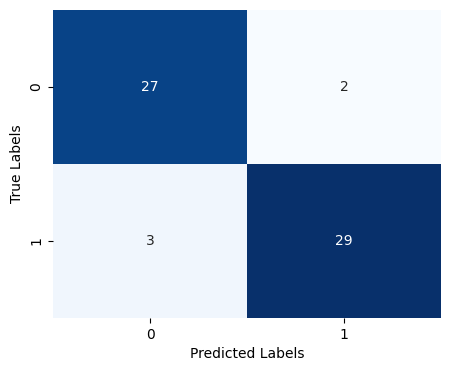

Confusion Matrix of Gaussian NB


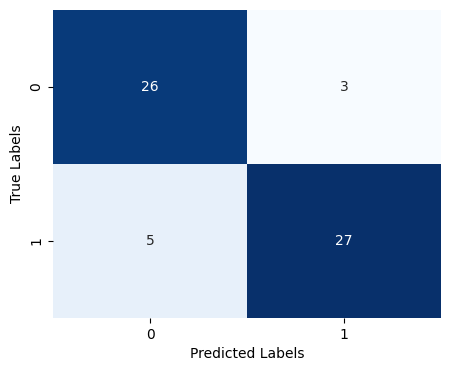

Confusion Matrix of Bernoulli NB


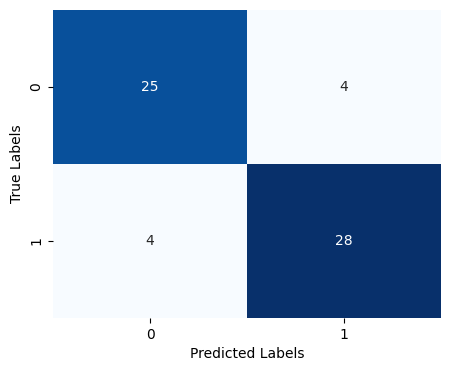

Confusion Matrix of Logistic Regression


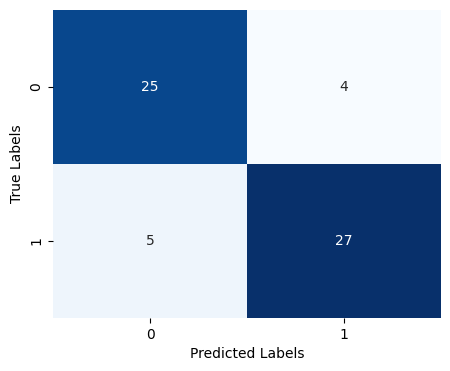

Confusion Matrix of Random Forest Classifier


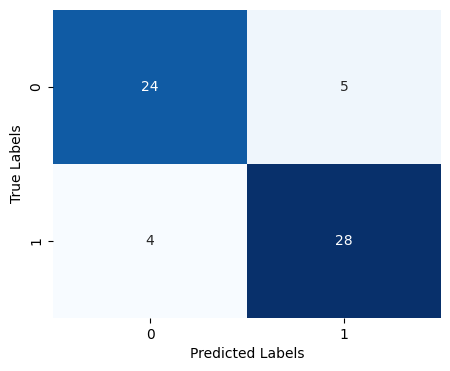

Confusion Matrix of Decision Tree Classifier


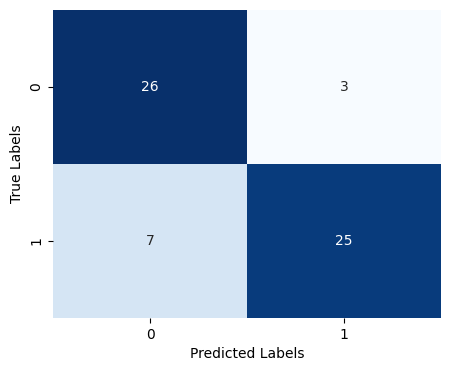

Confusion Matrix of Gradient Boosting Classifier


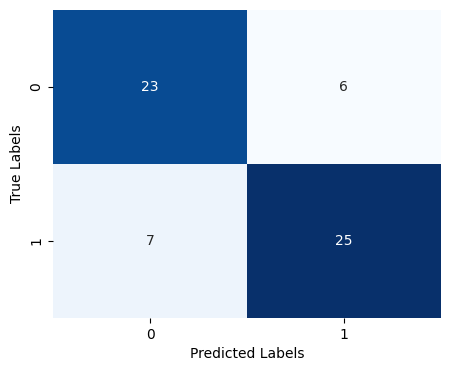

Classification Report of KNeighbors Classifier:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Classification Report of Gaussian NB:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Classification Report of Bernoulli NB:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   

,Accuracy Score
KNeighbors Classifier,0.918033
Gaussian NB,0.868852
Bernoulli NB,0.868852
Logistic Regression,0.852459
Random Forest Classifier,0.852459
Decision Tree Classifier,0.836066
Gradient Boosting Classifier,0.786885


In [181]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

## <font color='#A6032F'> Picking the Best Algorithm

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
k = KNeighborsClassifier()
model=k.fit(x_train,y_train)
predictions=model.predict(x_test)
score=accuracy_score(y_test,predictions)
score

0.9180327868852459

In [184]:
import joblib
joblib.dump(model, 'classification_model.pkl')

['classification_model.pkl']

## <font color='#A6032F'>Conclusion

The results of the heart disease prediction models indicate that the **KNeighbors Classifier** achieved the highest accuracy score of **91.80%**, outperforming all other models. The confusion matrix for this classifier demonstrates strong predictive performance, with **27 true negatives, 29 true positives, only 2 false positives, and 3 false negatives**. This suggests that the model effectively differentiates between patients with and without heart disease, with minimal misclassification.

Other models, such as **Gaussian NB (86.89%) and Bernoulli NB (86.89%)**, also performed well, followed closely by **Logistic Regression (85.25%) and Random Forest Classifier (85.25%)**. However, the **Gradient Boosting Classifier (78.69%)** had the lowest accuracy, indicating potential room for improvement with hyperparameter tuning or feature selection.

Overall, the **KNeighbors Classifier** appears to be the most effective model for this dataset.